Juan David Galan Vargas- 202111470- Tarea 1: Cumulos Abierto

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, integrate, simplify, oo, exp, lambdify
from scipy.integrate import quad

In [15]:
#Constantes
from scipy.constants import h, c, k

In [16]:
# Ley de Planck
def planck_ley(W, T):
    v=c/W
    return (2 * h * (c**2)) / ((W**5) * (np.exp((h * c) / (W* k * T)) - 1))
    #return (2 * h * (c) )/ (W**3 * (np.exp((h * (c/W)) / (k * T)) - 1))
    #return (2 * h * v**3) / (c**2 * (np.exp((h * v) / (k * T)) - 1))
def integral(low, up, t):
    integrand = lambda x: planck_ley(x, t)
    intensidad, _ = quad(integrand, low, up)
    return intensidad* np.pi
def mag_aparente(MagAbs, d): #Menos a 10 Parsecs
    return 5*np.log10(d) - 5 + MagAbs

In [17]:
#Longitudes de Onda
W = np.linspace(1e-9, 3e-6, 1000)
#Filtros
#U (Ultravioleta)
U1= 300e-9
U2= 400e-9
#B ("Blue")
B1= 350e-9
B2= 550e-9
#V (Visual)
V1= 450e-9
V2= 700e-9

T0=5778
FsU= integral(U1, U2, T0)
FsB= integral(B1, B2, T0)
FsV= integral(V1, V2, T0)

La longitud de onda de maxima emisión para un cuerpo negro a 5778K es 501.48840429214266 nm


C:\Users\juang\AppData\Local\Temp/ipykernel_18384/453663247.py:4: RuntimeWarning: overflow encountered in exp
  return (2 * h * (c**2)) / ((W**5) * (np.exp((h * c) / (W* k * T)) - 1))


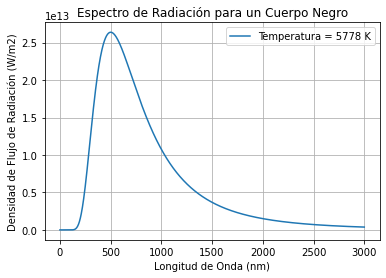

La magnitud para el filtro U es: -25.990953366376637
La magnitud para el filtro B es: -26.160953366376635
La magnitud para el filtro V es: -26.790953366376637
La longitud de onda de maxima emisión para un cuerpo negro a 9600K es 301.83333333333337 nm


C:\Users\juang\AppData\Local\Temp/ipykernel_18384/453663247.py:4: RuntimeWarning: overflow encountered in exp
  return (2 * h * (c**2)) / ((W**5) * (np.exp((h * c) / (W* k * T)) - 1))


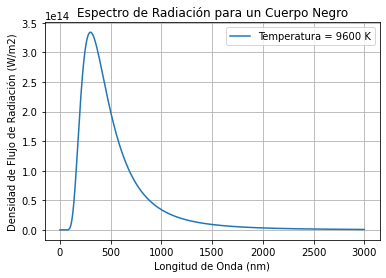

La magnitud para el filtro U es: 1.9375567951457051
La magnitud para el filtro B es: 2.3791933223084323
La magnitud para el filtro V es: 2.2243362734844108
La longitud de onda de maxima emisión para un cuerpo negro a 25200K es 114.98412698412699 nm


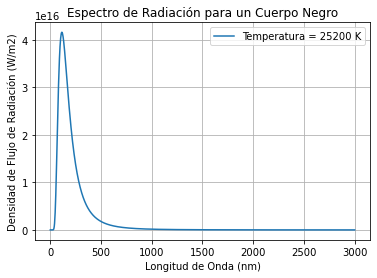

La magnitud para el filtro U es: -3.5295934822459323
La magnitud para el filtro B es: -2.6053194870398153
La magnitud para el filtro V es: -2.3507697517425425


In [18]:
def Mag_filtro(W, T, d):
    #Intensidad de Radiación
    I = planck_ley(W, T)
    #Maxima Emision
    b=0.0028976
    Alfa_max=(b/T)*10**9
    print(f"La longitud de onda de maxima emisión para un cuerpo negro a {T}K es {Alfa_max} nm" )
    # Grafico
    plt.plot(W * 1e9, I, label=f'Temperatura = {T} K')
    plt.xlabel('Longitud de Onda (nm)')
    plt.ylabel('Densidad de Flujo de Radiación (W/m2)')
    plt.title("Espectro de Radiación para un Cuerpo Negro")
    plt.legend()
    plt.grid(True)
    plt.show()
    #Filtro U
    flujoU = integral(U1, U2, T)
    MagAbsU= -2.5*np.log10(flujoU/FsU)+5.61
    resultU= mag_aparente(MagAbsU, d)
    print(f"La magnitud para el filtro U es: {resultU}")
    #Filtro B
    flujoB = integral(B1, B2, T)
    MagAbsB= -2.5*np.log10(flujoB/FsB)+5.44
    resultB= mag_aparente(MagAbsB, d)
    print(f"La magnitud para el filtro B es: {resultB}")
    #Filtro V
    flujoV = integral(V1, V2, T)
    MagAbsV= -2.5*np.log10(flujoV/FsV)+4.81
    resultV= mag_aparente(MagAbsV, d)
    print(f"La magnitud para el filtro V es: {resultV}")
    return [resultU, resultB, resultV]
Sol=Mag_filtro(W,5778, 0.0000047842) #Sol
Vega=Mag_filtro(W,9600, 7.66503) #Vega
Sirio=Mag_filtro(W,25200, 2.6367) #Sirio B
